In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_loader = torch.utils.data.DataLoader(datasets.MNIST('./data', train=True, download=True, transform=transform), batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST('./data', train=False, download=True, transform=transform), batch_size=1000, shuffle=False)

input_size = 28 * 28
hidden_size = 300
output_size = 10
model = NeuralNetwork(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

num_epochs = 25
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:01<00:00, 8390609.06it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 353158.08it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 5289202.47it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100%|██████████████████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [4]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return torch.log_softmax(x, dim=1)

In [5]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0
    for batch_idx, (data, target) in enumerate(train_loader):
        data = data.view(data.size(0), -1)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted_train = torch.max(output, 1)
        total_train += target.size(0)
        correct_train += (predicted_train == target).sum().item()
    train_accuracy = 100 * correct_train / total_train
    train_accuracies.append(train_accuracy)
    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    test_loss = 0.0
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data, target in test_loader:
            data = data.view(data.size(0), -1)
            output = model(data)
            loss = criterion(output, target)
            test_loss += loss.item()
            _, predicted_test = torch.max(output, 1)
            total_test += target.size(0)
            correct_test += (predicted_test == target).sum().item()
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        test_accuracy = 100 * correct_test / total_test
        test_accuracies.append(test_accuracy)

        print(f'Epoch [{epoch + 1}/{num_epochs}], '
              f'Training Loss: {train_loss:.4f}, '
              f'Training Accuracy: {train_accuracy:.2f}%, '
              f'Test Loss: {test_loss:.4f}, '
              f'Test Accuracy: {test_accuracy:.2f}%')

Epoch [1/25], Training Loss: 0.4001, Training Accuracy: 87.81%, Test Loss: 0.2246, Test Accuracy: 93.42%
Epoch [2/25], Training Loss: 0.1996, Training Accuracy: 94.05%, Test Loss: 0.1694, Test Accuracy: 94.93%
Epoch [3/25], Training Loss: 0.1439, Training Accuracy: 95.70%, Test Loss: 0.1308, Test Accuracy: 95.88%
Epoch [4/25], Training Loss: 0.1147, Training Accuracy: 96.64%, Test Loss: 0.1042, Test Accuracy: 96.84%
Epoch [5/25], Training Loss: 0.0943, Training Accuracy: 97.26%, Test Loss: 0.0957, Test Accuracy: 97.07%
Epoch [6/25], Training Loss: 0.0804, Training Accuracy: 97.65%, Test Loss: 0.0868, Test Accuracy: 97.20%
Epoch [7/25], Training Loss: 0.0688, Training Accuracy: 97.94%, Test Loss: 0.0802, Test Accuracy: 97.61%
Epoch [8/25], Training Loss: 0.0601, Training Accuracy: 98.23%, Test Loss: 0.0770, Test Accuracy: 97.57%
Epoch [9/25], Training Loss: 0.0525, Training Accuracy: 98.50%, Test Loss: 0.0770, Test Accuracy: 97.56%
Epoch [10/25], Training Loss: 0.0481, Training Accuracy

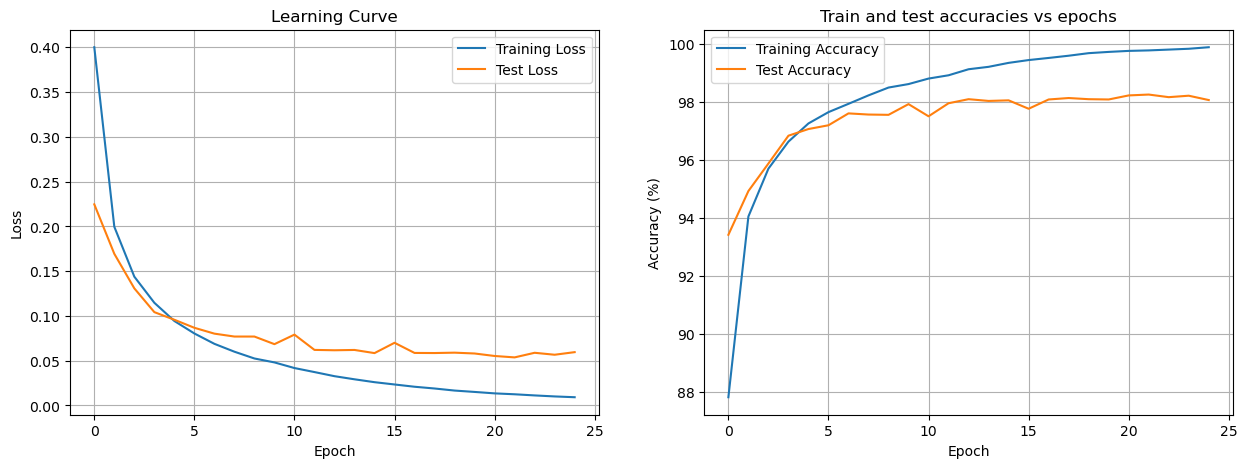

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.grid()
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Train and test accuracies vs epochs')
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()